In [12]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt

In [45]:
def plotImages(image_arr):
    fig,axes=plt.subplots(1,4,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [74]:
gen=ImageDataGenerator(rotation_range=10,zoom_range=0.2,channel_shift_range=10,horizontal_flip=True,vertical_flip=True)

In [17]:
chosen_image=random.choice(os.listdir("train_images"))

In [20]:
image_path="train_images/"+ chosen_image

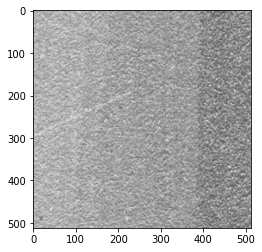

In [31]:
image=np.expand_dims(cv2.imread(image_path),0)
plt.imshow(image[0])

In [70]:
image.shape

(1, 512, 512, 3)

In [75]:
aug_iter=gen.flow(image)

In [76]:
aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range(4)]

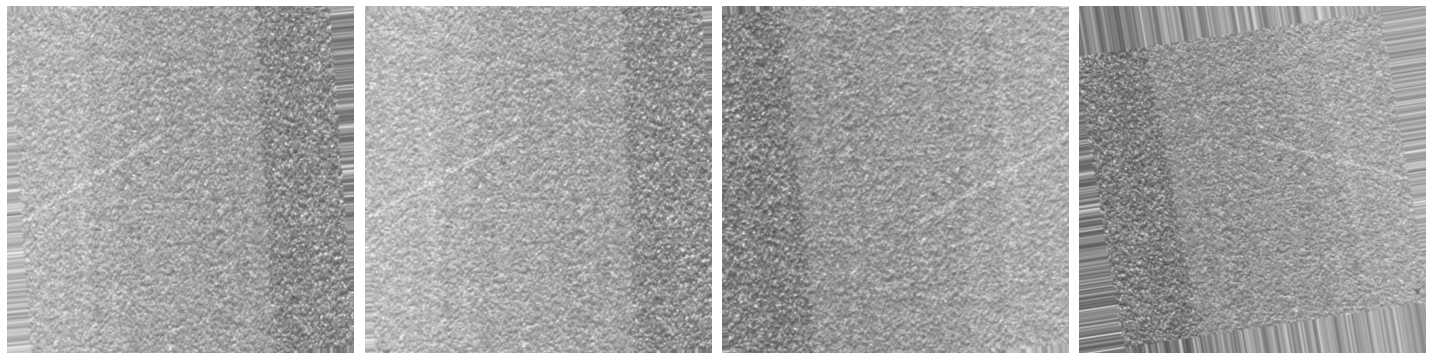

In [77]:
plotImages(aug_images)

In [78]:
df=pd.read_csv('train.csv')

In [86]:
df.loc[0, "ID"]

'train_00000.png'

In [87]:
output=np.array(["ID","Label"])
answer_sheet=[]
out_path="augmentation/"
num=["aug1","aug2","aug3","aug4"]
for i in range(0,len(df)):
    image_path="train_images/"+ df.loc[i, "ID"]
    label=df.loc[i, "Label"]
    image=np.expand_dims(cv2.imread(image_path),0)
    aug_iter=gen.flow(image)
    aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range(4)]
    for img,n in zip(aug_images,num):
        name=n+"_"+df.loc[i, "ID"]
        answer_sheet.append([name,label])
        cv2.imwrite((out_path+name),img)
for i in answer_sheet:
    output=np.row_stack((output,i))
np.savetxt("result.csv", output, delimiter=",",fmt='%s')